## 15分钟MA5&MA13

In [ ]:
# from tick_trade_api import TradeAPI
# # 输入指定账户
# # trade_api=TradeAPI('376000093011',order_policy=MarketPolicy)
# trade_api=TradeAPI('79644908',order_policy=MarketPolicy)

# 15分钟一股MA5&ma13y
# 15分钟MA5&MA13

source_code="""

# 初始化函数,全局只运行一次
import matplotlib.pyplot as plt
import datetime

def init(context):
    # 打印日志
    print('策略开始运行,初始化函数全局只运行一次')
    # 设置股票每笔交易的手续费
    set_commission(PerShare(type='stock',cost=0.00025))
    # 设置基准收益
    #set_benchmark('000300.SH')
    set_benchmark('002060.SZ')
    # 设置操作标的：
    #context.stockpool = ['002545.SZ','002941.SZ','600975.SH','600153.SH','600358.SH','000893.SZ','600985.SH','600716.SH','002567.SZ','002625.SZ', '600657.SH', '300803.SZ', '002060.SZ', '688208.SH', '600359.SH']
    #context.security = ['002625.SZ', '600657.SH', '300803.SZ', '002060.SZ', '688208.SH', '600359.SH']
    context.stockpool = ['002060.SZ']
    
    # 单个股票的仓位
    # context.buypct = 1/len(context.stockpool)
    context.buypct = 1
    # 止盈
    #context.stopwin = 888
    # 止损
    context.stoploss = 0.3
    
    # 记录时间
    # 获取时间
    time1 = get_datetime().strftime('%Y-%m-%d %H:%M:%S')
    context.date1 = time1[:10]
    context.date = time1[:10]
    context.runtime = 0
    print('context.runtime:', type(context.runtime), context.runtime)

    # 设置初识持仓
    set_holding_stocks(dict(zip(context.stockpool,[40000]*len(context.stockpool))))
    market_value = context.portfolio.stock_account.market_value
    total_value = context.portfolio.stock_account.total_value
    stocklist = list(context.portfolio.stock_account.positions)
    print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
    print()
 
        
# 盘中运行函数
def handle_bar(context, bar_dict):
    # 导入Python-talib库
    import talib
    

    # 数据获取与处理模块
    # 获取当前持仓
    context.runtime += 1
    holdstock = list(context.portfolio.stock_account.positions.keys())
    #print('当前持仓holdstock:', holdstock)
    for stock in context.stockpool:
        # 信号识别与下单模块
        # 获取股票过去15个小时的分钟收盘价数据
        closeprice = history(stock, ['close'], 240, '1m', False, 'pre', is_panel=1)
        time = get_datetime().strftime('%Y-%m-%d %H:%M:%S')

        # 计算小时K线的MA13均线
        MA13 = closeprice['close'].iloc[-75:-1].mean()
        MA13a = closeprice['close'].iloc[-90:-6].mean()
        # 计算MA5均线
        MA5 = closeprice['close'].iloc[-195:-1].mean()
        MA5a = closeprice['close'].iloc[-210:-16].mean()

        # 记录

        
        if context.runtime%15==0:
            #print('stock:',stock,'MA5=',MA5,'MA13=',MA13)
            # 如果MA5均线下窜死叉MA13均线,且账户当前有持仓,则该股票按占比context.buypct卖出
            if MA5a>MA13a and MA5<MA13 and stock in holdstock:
                new_cost = closeprice['close'].iloc[-1]
                cost_basis = context.portfolio.positions[stock].cost_basis
                # 记录这次卖出
                order_percent(stock, -context.buypct)
                #order_value(stock, -0.2)
                print('MA5=',MA5,'MA13=',MA13)
                log.info("MA5均线下窜死叉MA13均线, 卖出context.buypct占比 %s" % stock, '盈亏:',int((new_cost-cost_basis)/cost_basis*10000)/100,'%','成本价=',int(cost_basis*100)/100)

                market_value = context.portfolio.stock_account.market_value
                total_value = context.portfolio.stock_account.total_value
                stocklist = list(context.portfolio.stock_account.positions)
                print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
                print()


            # 如果MA5均线上窜金叉MA13均线,则按仓位占比context.buypct买入股票
            if MA5a < MA13a and MA5 > MA13 :
                # 记录这次买入
                order_percent(stock, context.buypct)
                cost_basis = context.portfolio.positions[stock].cost_basis
                print('MA5=',MA5,'MA13=',MA13)
                log.info("MA5均线上窜金叉MA13均线, 买入context.buypct占比 %s" % stock, '成本价=',int(cost_basis*100)/100)
                #order_target_percent(stock, 0.2)
                #order_value(stock, 0.2)

                market_value = context.portfolio.stock_account.market_value
                total_value = context.portfolio.stock_account.total_value
                stocklist = list(context.portfolio.stock_account.positions)
                print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
                print()
          


# 收盘后运行函数,用于储存自定义参数、全局变量,执行盘后选股等
def after_trading(context):
    # market_value = context.portfolio.stock_account.market_value
    # total_value = context.portfolio.stock_account.total_value
    # stocklist = list(context.portfolio.stock_account.positions)
    # print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
    
    
    # 获取时间
    time = get_datetime().strftime('%Y-%m-%d %H:%M:%S')
    # 打印时间
    log.info('{} 盘后运行'.format(time))
    log.info('一天结束')
    

"""


In [ ]:
# 15分钟一股MA5&ma13y
# 15分钟MA5&MA13

source_code="""

# 初始化函数,全局只运行一次
import matplotlib.pyplot as plt
import datetime

def init(context):
    # 打印日志
    print('策略开始运行,初始化函数全局只运行一次')
    # 设置股票每笔交易的手续费
    set_commission(PerShare(type='stock',cost=0.00025))
    # 设置基准收益
    #set_benchmark('000300.SH')
    set_benchmark('002060.SZ')
    # 设置操作标的：
    #context.stockpool = ['002545.SZ','002941.SZ','600975.SH','600153.SH','600358.SH','000893.SZ','600985.SH','600716.SH','002567.SZ','002625.SZ', '600657.SH', '300803.SZ', '002060.SZ', '688208.SH', '600359.SH']
    #context.security = ['002625.SZ', '600657.SH', '300803.SZ', '002060.SZ', '688208.SH', '600359.SH']
    context.stockpool = ['002060.SZ']
    
    # 单个股票的仓位
    # context.buypct = 1/len(context.stockpool)
    context.buypct = 1
    # 止盈
    #context.stopwin = 888
    # 止损
    context.stoploss = 0.3
    
    # 记录时间
    # 获取时间
    time1 = get_datetime().strftime('%Y-%m-%d %H:%M:%S')
    context.date1 = time1[:10]
    context.date = time1[:10]
    context.runtime = 0
    print('context.runtime:', type(context.runtime), context.runtime)

    # 设置初识持仓
    set_holding_stocks(dict(zip(context.stockpool,[40000]*len(context.stockpool))))
    market_value = context.portfolio.stock_account.market_value
    total_value = context.portfolio.stock_account.total_value
    stocklist = list(context.portfolio.stock_account.positions)
    print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
    print()
 
        
# 盘中运行函数
def handle_bar(context, bar_dict):
    # 导入Python-talib库
    import talib
    

    # 数据获取与处理模块
    # 获取当前持仓
    context.runtime += 1
    holdstock = list(context.portfolio.stock_account.positions.keys())
    #print('当前持仓holdstock:', holdstock)
    for stock in context.stockpool:
        # 信号识别与下单模块
        # 获取股票过去15个小时的分钟收盘价数据
        closeprice = history(stock, ['close'], 240, '1m', False, 'pre', is_panel=1)
        time = get_datetime().strftime('%Y-%m-%d %H:%M:%S')

        # 计算小时K线的MA13均线
        MA13 = closeprice['close'].iloc[-75:-1].mean()
        MA13a = closeprice['close'].iloc[-90:-6].mean()
        # 计算MA5均线
        MA5 = closeprice['close'].iloc[-195:-1].mean()
        MA5a = closeprice['close'].iloc[-210:-16].mean()

        # 记录

        
        if context.runtime%15==0:
            #print('stock:',stock,'MA5=',MA5,'MA13=',MA13)
            # 如果MA5均线下窜死叉MA13均线,且账户当前有持仓,则该股票按占比context.buypct卖出
            if MA5a>MA13a and MA5<MA13 and stock in holdstock:
                new_cost = closeprice['close'].iloc[-1]
                cost_basis = context.portfolio.positions[stock].cost_basis
                # 记录这次卖出
                order_percent(stock, -context.buypct)
                #order_value(stock, -0.2)
                print('MA5=',MA5,'MA13=',MA13)
                log.info("MA5均线下窜死叉MA13均线, 卖出context.buypct占比 %s" % stock, '盈亏:',int((new_cost-cost_basis)/cost_basis*10000)/100,'%','成本价=',int(cost_basis*100)/100)

                market_value = context.portfolio.stock_account.market_value
                total_value = context.portfolio.stock_account.total_value
                stocklist = list(context.portfolio.stock_account.positions)
                print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
                print()


            # 如果MA5均线上窜金叉MA13均线,则按仓位占比context.buypct买入股票
            if MA5a < MA13a and MA5 > MA13 :
                # 记录这次买入
                order_percent(stock, context.buypct)
                cost_basis = context.portfolio.positions[stock].cost_basis
                print('MA5=',MA5,'MA13=',MA13)
                log.info("MA5均线上窜金叉MA13均线, 买入context.buypct占比 %s" % stock, '成本价=',int(cost_basis*100)/100)
                #order_target_percent(stock, 0.2)
                #order_value(stock, 0.2)

                market_value = context.portfolio.stock_account.market_value
                total_value = context.portfolio.stock_account.total_value
                stocklist = list(context.portfolio.stock_account.positions)
                print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
                print()
          


# 收盘后运行函数,用于储存自定义参数、全局变量,执行盘后选股等
def after_trading(context):
    # market_value = context.portfolio.stock_account.market_value
    # total_value = context.portfolio.stock_account.total_value
    # stocklist = list(context.portfolio.stock_account.positions)
    # print('当前持仓市值:', market_value, '持仓股票列表', stocklist, '当前账户总资金:', int(total_value))
    
    
    # 获取时间
    time = get_datetime().strftime('%Y-%m-%d %H:%M:%S')
    # 打印时间
    log.info('{} 盘后运行'.format(time))
    log.info('一天结束')
    

"""


In [2]:
# 系统重置
try:
    import shutil
    shutil.rmtree('persist/研究环境策略')
except:
    pass


In [ ]:
# 模拟运行
#rtrade = research_trade('研究环境策略', source_code, capital_base=float(1000000), frequency='MINUTE', trade_api=trade_api)#trade_api可传入List[TradeAPI]，实现多账户交易


2021-12-30 00:00:00.000000 - INFO - 策略开始运行,初始化函数全局只运行一次
2021-12-30 00:00:00.000000 - INFO - 002060.SZ
2021-12-30 00:00:00.000000 - INFO - context.runtime: <class 'int'> 0
2021-12-30 00:00:00.000000 - INFO - 初始化002060.SZ持仓40000股
2021-12-30 00:00:00.000000 - INFO - 当前持仓市值: 218800.0 持仓股票列表 ['002060.SZ'] 当前账户总资金: 1218800
2021-12-30 00:00:00.000000 - INFO - 
2021-12-30 10:00:00.000000 - WARN - 可用资金不足，002060.SZ 成交180600股, 300股未成交
2021-12-30 10:00:00.000000 - INFO - MA5= 5.477628865979389 MA13= 5.476351351351352
2021-12-30 10:00:00.000000 - INFO - MA5均线上窜金叉MA13均线, 买入context.buypct占比 002060.SZ
2021-12-30 10:00:00.000000 - INFO - 当前持仓市值: 1217712.0 持仓股票列表 ['002060.SZ'] 当前账户总资金: 1217745
2021-12-30 10:00:00.000000 - INFO - 
2021-12-30 14:15:00.000000 - WARN - 002060.SZ 下单股数为0,订单无效.
2021-12-30 14:15:00.000000 - INFO - MA5= 5.586288659793812 MA13= 5.578378378378381
2021-12-30 14:15:00.000000 - INFO - MA5均线上窜金叉MA13均线, 买入context.buypct占比 002060.SZ
2021-12-30 14:15:00.000000 - INFO - 当前持仓市值: 1226536.0 

2022-01-26 10:30:00.000000 - INFO - 当前持仓市值: 475.0 持仓股票列表 ['002060.SZ'] 当前账户总资金: 1092913
2022-01-26 10:30:00.000000 - INFO - 
2022-01-26 15:30:00.000000 - INFO - 2022-01-26 15:30:00 盘后运行
2022-01-26 15:30:00.000000 - INFO - 一天结束
2022-01-27 15:30:00.000000 - INFO - 2022-01-27 15:30:00 盘后运行
2022-01-27 15:30:00.000000 - INFO - 一天结束
2022-01-28 15:30:00.000000 - INFO - 2022-01-28 15:30:00 盘后运行
2022-01-28 15:30:00.000000 - INFO - 一天结束
2022-02-07 15:30:00.000000 - INFO - 2022-02-07 15:30:00 盘后运行
2022-02-07 15:30:00.000000 - INFO - 一天结束
2022-02-08 11:30:00.000000 - INFO - MA5= 5.112216494845365 MA13= 5.111486486486486
2022-02-08 11:30:00.000000 - INFO - MA5均线上窜金叉MA13均线, 买入context.buypct占比 002060.SZ
2022-02-08 11:30:00.000000 - INFO - 当前持仓市值: 1091184.0 持仓股票列表 ['002060.SZ'] 当前账户总资金: 1091582
2022-02-08 11:30:00.000000 - INFO - 
2022-02-08 15:30:00.000000 - INFO - 2022-02-08 15:30:00 盘后运行
2022-02-08 15:30:00.000000 - INFO - 一天结束
2022-02-09 15:30:00.000000 - INFO - 2022-02-09 15:30:00 盘后运行
2022-02-09

2022-03-22 15:30:00.000000 - INFO - 一天结束
2022-03-23 15:30:00.000000 - INFO - 2022-03-23 15:30:00 盘后运行
2022-03-23 15:30:00.000000 - INFO - 一天结束
2022-03-24 15:30:00.000000 - INFO - 2022-03-24 15:30:00 盘后运行
2022-03-24 15:30:00.000000 - INFO - 一天结束
2022-03-25 14:30:00.000000 - WARN - 下单失败: [002060.SZ] 已涨停。
2022-03-25 14:30:00.000000 - INFO - MA5= 9.17000000000002 MA13= 9.169999999999993
2022-03-25 14:30:00.000000 - INFO - MA5均线上窜金叉MA13均线, 买入context.buypct占比 002060.SZ
2022-03-25 14:30:00.000000 - INFO - 当前持仓市值: 0.0 持仓股票列表 ['002060.SZ'] 当前账户总资金: 1193623
2022-03-25 14:30:00.000000 - INFO - 
2022-03-25 15:30:00.000000 - INFO - 2022-03-25 15:30:00 盘后运行
2022-03-25 15:30:00.000000 - INFO - 一天结束
2022-03-28 15:30:00.000000 - INFO - 2022-03-28 15:30:00 盘后运行
2022-03-28 15:30:00.000000 - INFO - 一天结束
2022-03-29 15:30:00.000000 - INFO - 2022-03-29 15:30:00 盘后运行
2022-03-29 15:30:00.000000 - INFO - 一天结束
2022-03-30 15:30:00.000000 - INFO - 2022-03-30 15:30:00 盘后运行
2022-03-30 15:30:00.000000 - INFO - 一天结束
2

2022-05-05 13:45:00.000000 - INFO - MA5均线下窜死叉MA13均线, 卖出context.buypct占比 002060.SZ
2022-05-05 13:45:00.000000 - INFO - 当前持仓市值: 0 持仓股票列表 [] 当前账户总资金: 1136591
2022-05-05 13:45:00.000000 - INFO - 
2022-05-05 15:30:00.000000 - INFO - 2022-05-05 15:30:00 盘后运行
2022-05-05 15:30:00.000000 - INFO - 一天结束
2022-05-06 15:30:00.000000 - INFO - 2022-05-06 15:30:00 盘后运行
2022-05-06 15:30:00.000000 - INFO - 一天结束
2022-05-09 15:30:00.000000 - INFO - 2022-05-09 15:30:00 盘后运行
2022-05-09 15:30:00.000000 - INFO - 一天结束
2022-05-10 10:00:00.000000 - INFO - MA5= 7.387113402061863 MA13= 7.381486486486482
2022-05-10 10:00:00.000000 - INFO - MA5均线上窜金叉MA13均线, 买入context.buypct占比 002060.SZ
2022-05-10 10:00:00.000000 - INFO - 当前持仓市值: 1135160.0 持仓股票列表 ['002060.SZ'] 当前账户总资金: 1136707
2022-05-10 10:00:00.000000 - INFO - 
2022-05-10 15:30:00.000000 - INFO - 2022-05-10 15:30:00 盘后运行
2022-05-10 15:30:00.000000 - INFO - 一天结束
2022-05-11 14:15:00.000000 - INFO - MA5= 8.199948453608245 MA13= 8.16972972972973
2022-05-11 14:15:00.0000

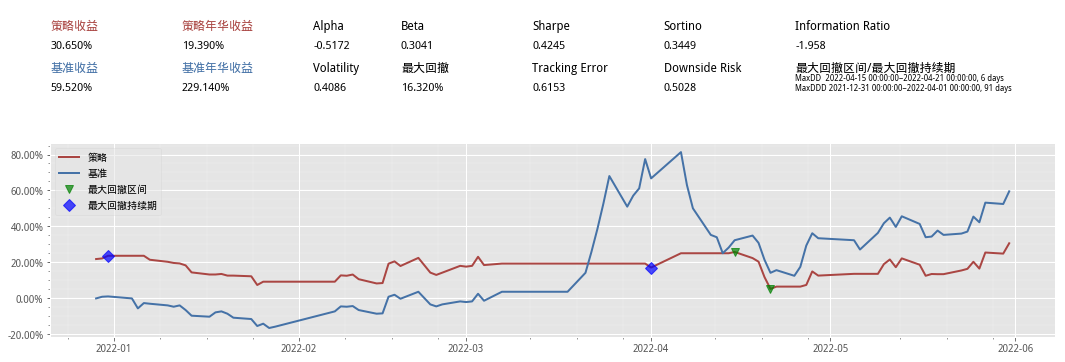

{'analyser': {'benchmark_portfolio':             close  unit_net_value
  2021-12-29   5.41        1.000000
  2021-12-30   5.46        1.009242
  2021-12-31   5.47        1.011091
  2022-01-04   5.41        1.000000
  2022-01-05   5.11        0.944547
  2022-01-06   5.27        0.974122
  2022-01-07   5.25        0.970425
  2022-01-10   5.20        0.961183
  2022-01-11   5.16        0.953789
  2022-01-12   5.20        0.961183
  2022-01-13   5.06        0.935305
  2022-01-14   4.89        0.903882
  2022-01-17   4.86        0.898336
  2022-01-18   4.99        0.922366
  2022-01-19   5.02        0.927911
  2022-01-20   4.95        0.914972
  2022-01-21   4.83        0.892791
  2022-01-24   4.79        0.885397
  2022-01-25   4.58        0.846580
  2022-01-26   4.65        0.859519
  2022-01-27   4.52        0.835490
  2022-01-28   4.56        0.842884
  2022-02-07   5.02        0.927911
  2022-02-08   5.17        0.955638
  2022-02-09   5.16        0.953789
  2022-02-10   5.18        0.

In [3]:
# 回测运行
# research_strategy(source_code, start_date=None, end_date=None, capital_base=100000, frequency='DAILY', stock_market='STOCK', benchmark=None)
research_strategy(source_code, start_date='20211230', end_date='20220531', capital_base=float(1000000), frequency='MINUTE', stock_market='STOCK', benchmark=None)
